In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2024-09-21 17:12:49.762033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 17:12:49.824254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 17:12:49.841506: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 17:12:49.932563: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-21 17:12:51.582992: W tensorflow/compiler/tf2

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-09-21 17:12:59--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-09-21 17:13:00 (61.2 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# one hot encode sex, smoker, region to number

dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], prefix=['sex', 'smoker', 'region'])


In [4]:
# split the dataset into a training set and a test set

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [5]:
# Separate the expenses value 

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')



In [6]:
# create layer normailzer

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))


2024-09-21 17:14:25.560956: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [11]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (8, 11)                │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

In [12]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mae',
    metrics=['mae', 'mse']
)

In [13]:
history = model.fit(
    train_dataset, train_labels,
    epochs=500,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,
    batch_size = 4)

Epoch 1/500
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12558.2256 - mae: 12558.2256 - mse: 290993504.0000 - val_loss: 14427.1367 - val_mae: 14427.1367 - val_mse: 363292832.0000
Epoch 2/500
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12078.9863 - mae: 12078.9863 - mse: 281796608.0000 - val_loss: 14422.3760 - val_mae: 14422.3760 - val_mse: 363159328.0000
Epoch 3/500
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13159.4170 - mae: 13159.4170 - mse: 330867232.0000 - val_loss: 14413.7217 - val_mae: 14413.7217 - val_mse: 362923872.0000
Epoch 4/500
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12499.0381 - mae: 12499.0381 - mse: 296481920.0000 - val_loss: 14399.8018 - val_mae: 14399.8018 - val_mse: 362548192.0000
Epoch 5/500
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13090.7891 - mae: 13090.7891 - mse: 325553792.0000 - val_loss: 14379.4346 - val_mae: 14379.4346 - val_mse: 362009504.0000
Epoch 6/500
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12433.6406 - mae: 12433.

9/9 - 0s - 5ms/step - loss: 3286.9951 - mae: 3286.9951 - mse: 44646420.0000
Testing set Mean Abs Error: 3287.00 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


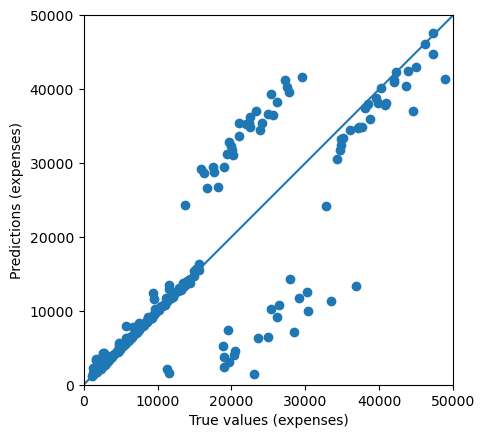

In [14]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
